# LLM Pretraining in PyTorch - Implementation

#### Step 1: Import necessary libraries

In [7]:
import torch
import torch.nn as nn # Helps us with measuring errors (loss functions)
import torch.optim as optim # Helps the model learn from its mistakes
import matplotlib.pyplot as plt

#### STEP 2: PREPARE LEARNING MATERIAL
- Imagine each batch as a group of practice questions.
- Here we're generating random input and output data just for demonstration.
- In real training, these would be tokenized text data.

In [9]:
train_data = [ (torch.randn(4, 10), torch.randn(4, 10)) for _ in range(5)] # 5 training batches
val_data = [ (torch.randn(4, 10), torch.randn(4, 10)) for _ in range(2) ]   # 2 validation batches

#### STEP 3: GIVE THE MODEL A SIMPLE BRAIN
- The brain is made of weights and bias (just numbers it uses to make decisions)
- We tell PyTorch to keep track of these numbers and let them be updated during training

In [11]:
model_weights = torch.randn(10, 10, requires_grad=True) # weight matrix: input 10 --> output 10
model_bias = torch.randn(10, requires_grad=True) # weight matrix: input 10 --> output 10

#### STEP 4: DEFINE HOW TO MEASURE MISTAKES
- We'll use Mean Squared Error (MSE): It calculates how far off the guess was from the actual answer

In [13]:
# Define how to measure mistakes (loss function)
loss_fn = nn.MSELoss()

# Choose how to fix the mistakes (optimizer)
# AdamW is a smart algorithm that updates weights in an efficient way
optimizer = optim.AdamW([model_weights, model_bias], lr=0.001)

#### # STEP 5–13: Training and validation loop

In [27]:
# STEP 5: START TRAINING ROUND (EPOCH)
# We'll repeat the training process for 3 rounds (like 3 revision sessions)
train_losses = []
val_losses = []

for epoch in range(3):
    print(f"\n * Epoch {epoch+1} begins")
    total_train_loss = 0

# STEP 6: GO THROUGH EACH BATCH OF TRAINING DATA
    for input_data, target_data in train_data:
        # STEP 7: MODEL MAKES A GUESS
        # This is like: prediction = input × weight + bias
        output = input_data @ model_weights + model_bias # Matrix multiplication

         # STEP 8: MEASURE HOW WRONG THE GUESS WAS
        loss = loss_fn(output, target_data)

        # STEP 9: CLEAR OLD GRADIENTS
        # This removes memory of past mistakes so they don’t interfere
        optimizer.zero_grad()

        # STEP 10: FIGURE OUT HOW TO FIX MISTAKE
        loss.backward() # Backpropagation: Think of it like reflecting on the mistake

         # STEP 11: UPDATE THE BRAIN
        optimizer.step()  # Actually change the weights and bias a bit

        # Add this batch's loss to total
        total_train_loss += loss.item()

    
     # STEP 12: RECORD THE TRAINING PROGRESS
    avg_train_loss = total_train_loss / len(train_data)
    train_losses.append(avg_train_loss)
    print(f"Average training loss: {avg_train_loss:.4f}")

    
    # STEP 13: TEST ON UNSEEN DATA (VALIDATION)
    # We don’t want to change the brain during this, only check how well it works
    model_weights.requires_grad = False
    model_bias.requires_grad = False

    total_val_loss = 0
    for val_input, val_target in val_data:
        val_output = val_input @ model_weights + model_bias
        val_loss = loss_fn(val_output, val_target)
        total_val_loss += val_loss.item()

    avg_val_loss = total_val_loss / len(val_data)
    val_losses.append(avg_val_loss)
    print(f"Average validation loss: {avg_val_loss:.4f}")
    
    # Turn gradients back on for the next epoch
    model_weights.requires_grad = True
    model_bias.requires_grad = True


 * Epoch 1 begins
Average training loss: 12.8855
Average validation loss: 12.7766

 * Epoch 2 begins
Average training loss: 12.8094
Average validation loss: 12.7292

 * Epoch 3 begins
Average training loss: 12.7337
Average validation loss: 12.6820


#### STEP 14: Plot the results

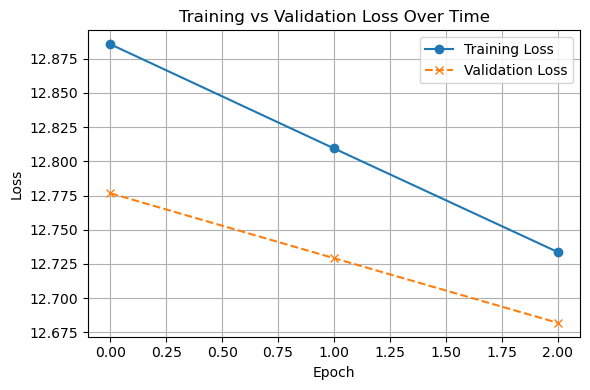

In [29]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 4)) 
ax.plot(train_losses, label="Training Loss", marker='o')
ax.plot(val_losses, label="Validation Loss", linestyle="--", marker='x')
ax.set_xlabel("Epoch")
ax.set_ylabel("Loss")
ax.set_title("Training vs Validation Loss Over Time")
ax.legend()
ax.grid(True)
plt.tight_layout()
plt.show()


#### Meaning of the above output - 
- Both training and validation loss are decreasing --> our model is learning and improving.
- Validation loss is slightly lower than training loss, which is unusual but okay in early phases, it may suggest our model is not overfitting yet.
- We can train for a few more epochs to see if the gap between the two widens. If training loss keeps dropping and validation loss plateaus or rises, that’s a sign of overfitting.